In [1]:
import pandas as pd
import altair as alt

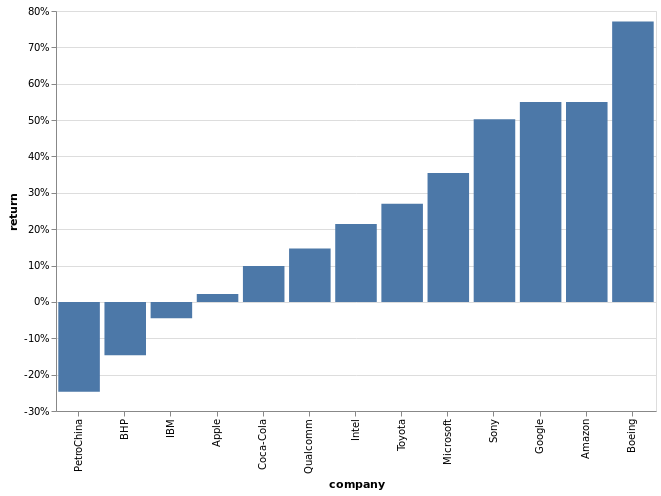

In [2]:
ticker_list = {
    'INTC': 'Intel',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'BHP': 'BHP',
    'TM': 'Toyota',
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'BA': 'Boeing',
    'QCOM': 'Qualcomm',
    'KO': 'Coca-Cola',
    'GOOG': 'Google',
    'SNE': 'Sony',
    'PTR': 'PetroChina'
}
df = (
    pd.read_csv('ticker_data.csv', parse_dates=['Date'])
    .set_index('Date')
    .rename(columns=ticker_list)
    .iloc[[0,-1]]
    .pct_change()
    .iloc[-1]
    .rename('return')
    .to_frame()
    .rename_axis(index='company')
    .sort_values(by='return')
    .reset_index()
)
cht = (
    alt.Chart(df)
    .mark_bar()
    .encode(
        x=alt.X('company:O', sort=alt.EncodingSortField(field='return', op='mean')),
        y=alt.Y('return:Q', axis=alt.Axis(format='%'))
    )
    .properties(width=600, height=400)
)
cht